In [ ]:
# Medical Cost Personal Insurance Project

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
We can observe that the data and its shape(rows x columns)

This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
We can conclude that there are no null values in the dataset given above.

In [18]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

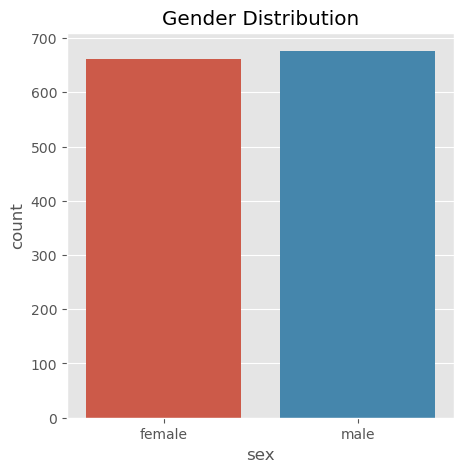

In [37]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution')
plt.show()       

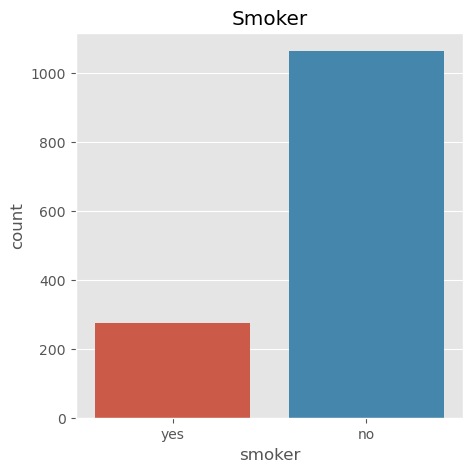

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=data)
plt.title('Smoker')
plt.show()

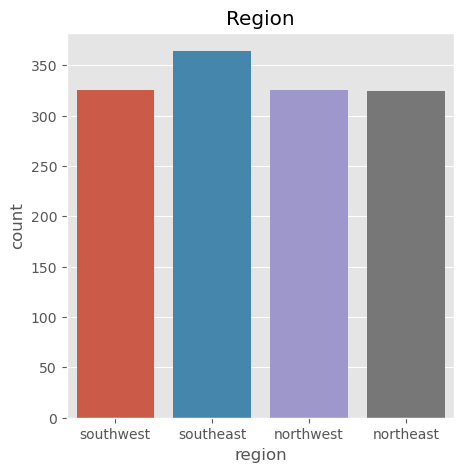

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost Vs Region')

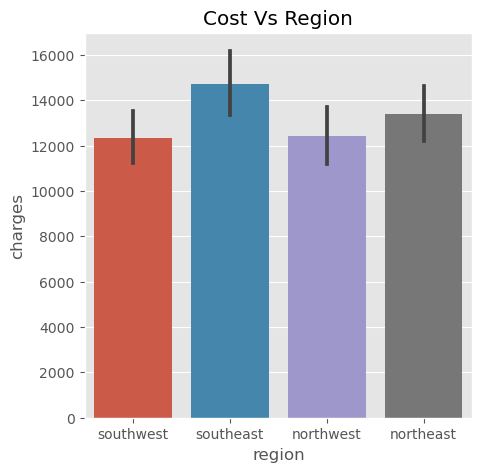

In [40]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=data)
plt.title('Cost Vs Region')

Text(0.5, 1.0, 'Charges for smokers')

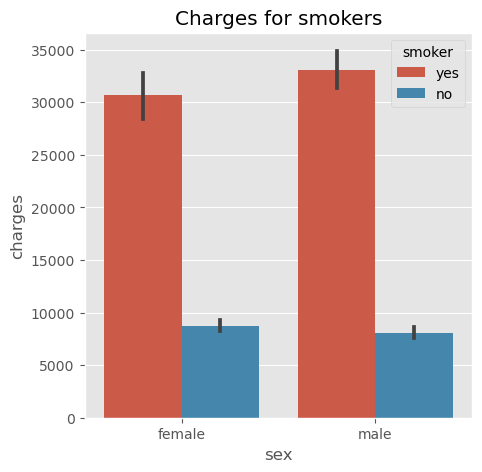

In [42]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=data)
plt.title('Charges for smokers')

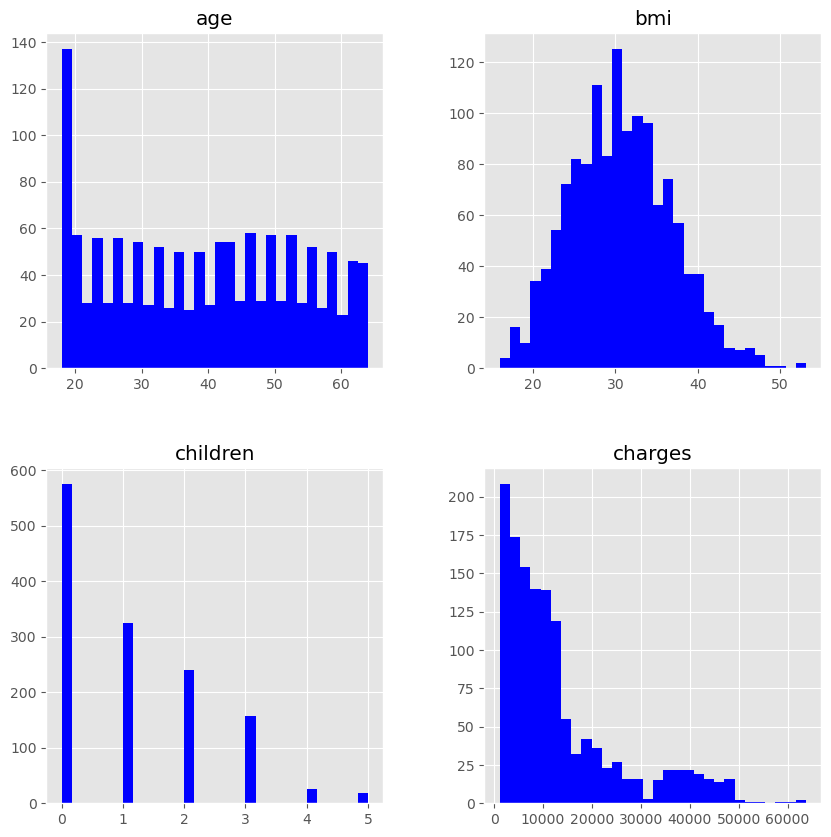

In [48]:
data[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [49]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get)
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [51]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


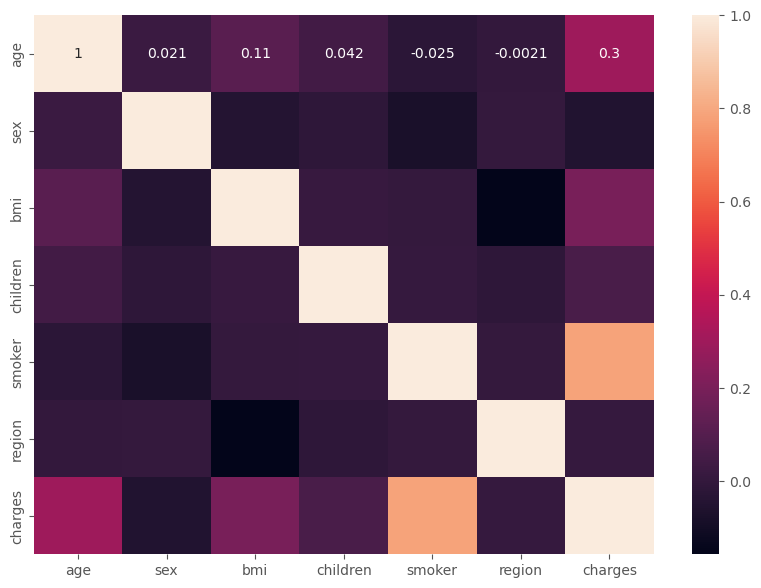

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [54]:
X = data.drop(['charges', 'sex'], axis=1)
y = data.charges

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shpae:  (936,)
y_test shape:  (402,)


In [56]:
linreg= LinearRegression()

In [57]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [58]:
from sklearn.metrics import r2_score

In [59]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7697211527941855


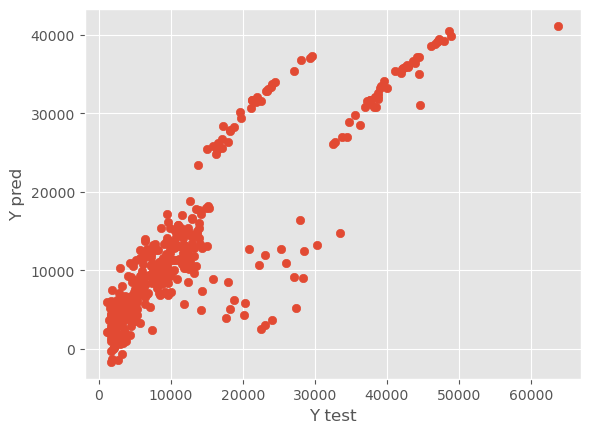

In [60]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [61]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_data = pd.DataFrame(data, index)
cust_data

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [62]:
cost_pred = linreg.predict(cust_data)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33206.92756082]
